In [399]:
import numpy as np
import cv2
from keras.preprocessing.image import  ImageDataGenerator
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [400]:
src = cv2.imread('Grid_image.jpg')
src2 = cv2.imread('kaimuk.jpg')
img2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

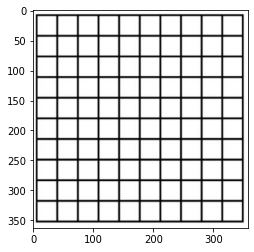

In [401]:
plt.imshow(src)

# 7.1 Effects of Interpolation 

In [402]:
def interpolate(src):
    reduce_factors =  np.array([2,8,15]) # 2 is very small resize factor
    scale_factors = 1/reduce_factors
    inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR,cv2.INTER_CUBIC,cv2.INTER_AREA]
    meth_label = ["INTER_NEAREST","INTER_LINEAR","INTER_CUBIC","INTER_AREA"]
    
    
    f,ax = plt.subplots(3,4,figsize=(18,16))

    y = 0
    for sf in scale_factors:
        x = 0
        for meth in inter_methods:
            im = cv2.resize(src, ((int)(src.shape[1]*sf),(int)(src.shape[0]*sf)), interpolation=meth)
            title = meth_label[meth] + " (" + str(im.shape[1]) + " x "  + str(im.shape[0]) + ")"
            ax[y,x].set_title(title)
            ax[y,x].imshow(im)
            x += 1
        y += 1
    f.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13340\2440958523.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


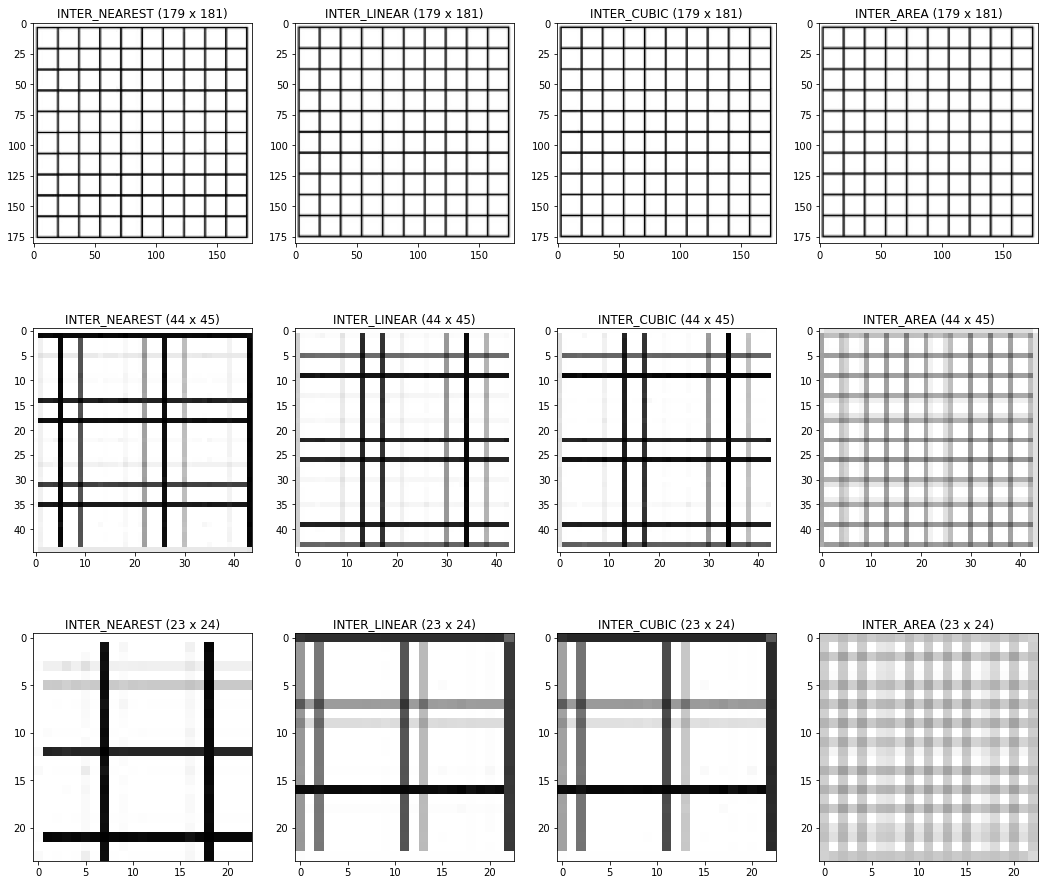

In [403]:
interpolate(src)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13340\2440958523.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


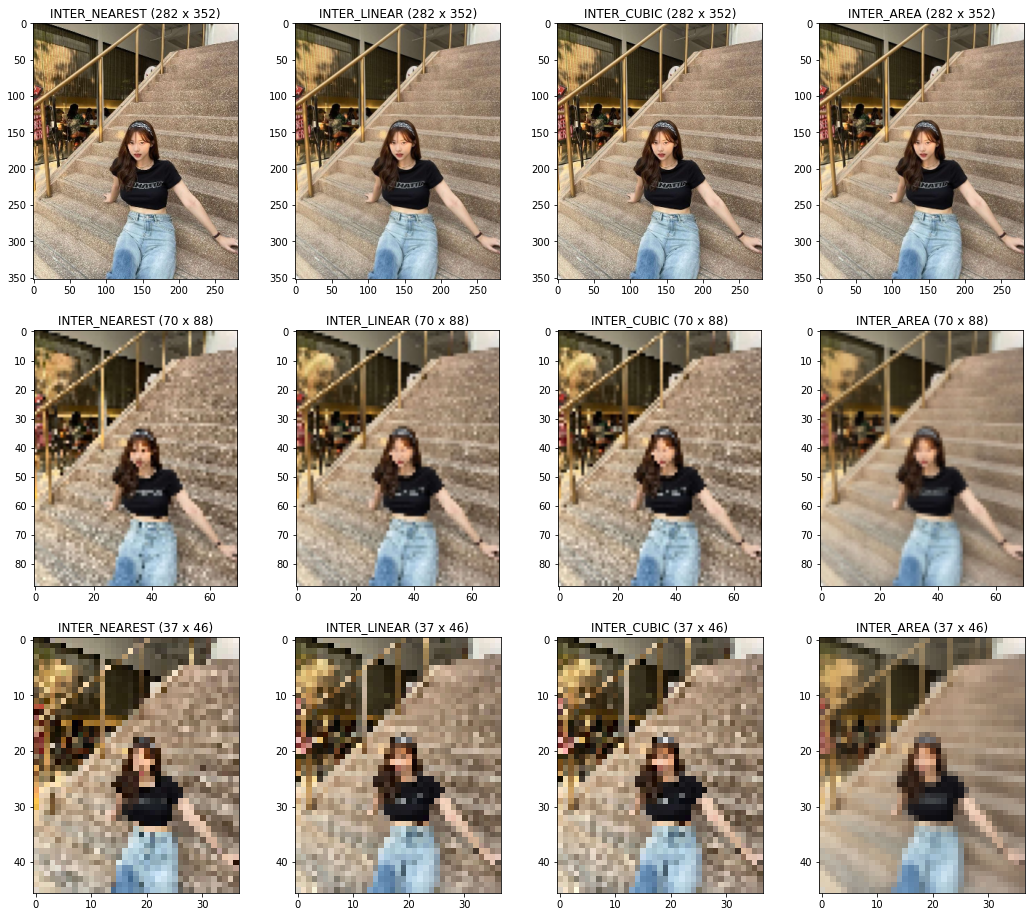

In [404]:
interpolate(img2)

# 7.2 Image Augmentation

In [405]:
# Augmentation mean increasing
def write_video(file_path, frames, fps):
    w, h = frames[0].shape[1], frames[0].shape[0]   # 300, 300
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    writer = cv2.VideoWriter(file_path, fourcc, fps, (w, h))

    for frame in frames:
        writer.write(frame)

    writer.release()
# ref: https://www.programcreek.com/python/example/72134/cv2.VideoWriter


In [406]:
use_image = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR) # back to BGR
use_image = img_to_array(use_image) # from keras lib (just to make sure, can comment out)
print(use_image.shape)
use_image = np.expand_dims(use_image, 0) # 3d to 4d size # -> like get 1 array cover all 3D for "1 array" only
print(use_image.shape)
fill_method = ['constant','nearest','reflect','wrap'] # declare
# not fill(black), nearest color, mirror, use another zone for display
frames = []

(704, 564, 3)
(1, 704, 564, 3)


In [407]:
Npic = 9 # number of Picture
rotation_range = 90 # degrees ?
width_shift_range = 50.0  # shift left-right pixels ? if 0-1 is 0%-100% if > 1 will be pixels (not confirm)
height_shift_range = 50.0 # shift up-down pixels ?
shear_range = 0.0 
zoom_range  = 0.0 # scale what unit?
horizontal_flip = False
vertical_flip = False

In [408]:
for m in fill_method:
    datagen = ImageDataGenerator(rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip,
                                 vertical_flip=vertical_flip,
                                 fill_mode = m)
    pic = datagen.flow(use_image, batch_size = 32) # 32 pic per set of random data
    for i in range(1, Npic):
        batch = pic.next()
        im_result = batch[0].astype('uint8') # choose first
        frames.append(im_result)

In [409]:
write_video('test.mp4', frames, 3)